In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
d=[]
for year in range(7,18):
    if year//10==0:
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(0)+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
    else :
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
len(d)

11

In [77]:
var = pd.read_csv('var.csv',header=None)
var = list(var[0].values)
len(var)

101

In [78]:
for kill in ['EC_wht_23', 'HE_DMfh3' ,'HE_HLdg' ,'HE_Bplt', 'N_MUFA' ,'N_N3' ,'N_SFA' ,'N_N6', 'N_PUFA', 'D_8_2', 'GS_mea_r_3', 'GS_mea_l_3', 'GS_mea_r_1', 'GS_mea_r_2', 'D_8_1', 'D_8_3']:
    
    var.remove(kill)

In [79]:
for kill in ['N_ASH' ,'N_FIBER', 'BS2_1', 'LQ_VAS' ,'DI1_lt']:
    var.remove(kill)

In [80]:
for kill in ['O_DMFTP', 'BP8' ,'OR1']:
    var.remove(kill)

In [81]:
var.remove('HE_HDL_st2')

In [82]:
var.remove('HE_HbA1c')

In [83]:
var.remove('BE3_33')

In [84]:
len(var)

74

In [72]:
import sys

mod = sys.modules[__name__]
for i in range(11):
    setattr(mod, 'd{}'.format(i+7), d[i][var])

In [87]:
df=[]
for i in range(11):
    data = d[i][var].dropna()
    df.append(data)

In [73]:
print(d7.shape)
d7.isnull().sum()

(4594, 73)


HE_wt         389
N_VITC        503
age             0
HE_BMI        389
HE_wc         391
N_FE          503
N_B1          503
N_B2          503
N_CA          503
N_CAROT       503
N_WAT_C       503
N_WATER       503
N_CHO         503
ainc_1         75
N_VA          503
N_RETIN       503
N_DIET        503
N_PROT        503
N_PHOS        503
N_NIAC        503
N_NA          503
N_EN          503
N_FAT         503
N_K           503
ainc          265
N_INTK        503
HE_ht         389
HE_sbp2      1021
HE_dbp1      1021
HE_dbp2      1021
             ... 
DI1_ag       1611
DI1_2        1611
BD2          1238
DI2_2        1611
DI2_pt       1611
DI1_pt       1611
HE_DMdr       348
educ         1238
genertn        75
DI2_pr       1611
HE_PLS       1176
cfam           75
DI2_dg       1611
HE_alt       1113
HE_ast       1114
HE_WBC       1127
HE_crea      1113
HE_HB        1127
EC_pedu_1    1611
HE_RBC       1127
HE_HCT       1127
HE_BUN       1113
HE_TG        1170
HE_chol      1170
BM8       

In [89]:
data = pd.concat([df[0],df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],df[10]], axis=0, ignore_index=True)

In [92]:
data['DE1_dg'].value_counts()

8.0    24620
0.0    24040
1.0     4021
9.0      503
Name: DE1_dg, dtype: int64

In [95]:
data[data['DE1_dg']==0]['DE1_dg']=8.0

C:\Users\NB-0242\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
data.loc[data['DE1_dg']==0, ['DE1_dg']] =8.0

In [104]:
data_ = data.loc[data['DE1_dg']!=9.0, :]
data_['DE1_dg'].value_counts()

8.0    48660
1.0     4021
Name: DE1_dg, dtype: int64

In [105]:
# data_.to_csv('data_.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [6]:
data_ = pd.read_csv('c:/users/nb-0242/jupyter/PHR/data_.csv')

# 모델링 가ㅡㅏ

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data_, data_['DE1_dg'],test_size=0.2)
X_train = X_train.iloc[:, ~X_train.columns.isin(['DE1_dg'])]
X_test = X_test.iloc[:, ~X_test.columns.isin(['DE1_dg'])]
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)


In [114]:
f1_score(y_test, rf_yhat)

0.2829525483304042

In [115]:
confusion_matrix(y_test, rf_yhat)

array([[ 161,  626],
       [ 190, 9560]], dtype=int64)

In [116]:
y_test.value_counts()

8.0    9750
1.0     787
Name: DE1_dg, dtype: int64

<h3> randomforest 최적화

In [131]:
n_est = range(5,11)
m_depth = range(30,len(X_train.columns)-1, 3)
f1_mat=[]
for n in n_est:
    f1_row=[]
    for m in m_depth:
        rf = RandomForestClassifier(n_jobs=-1,n_estimators=n, max_depth=m )
        rf.fit(X_train, y_train)
        rf_yhat = rf.predict(X_test)
        f1 = f1_score(y_test, rf_yhat)
        f1_row.append(f1)
    f1_mat.append(f1_row)

In [130]:
list(m_depth)

[40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70]

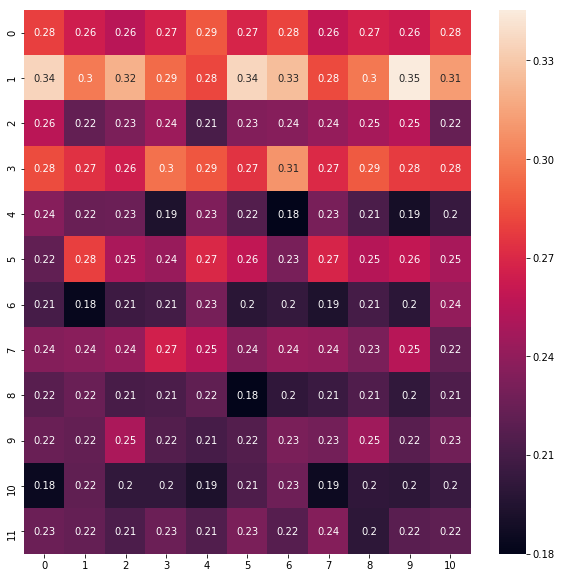

In [126]:
plt.figure(figsize=(10,10),)
sns.heatmap(np.array(f1_mat),annot=True)

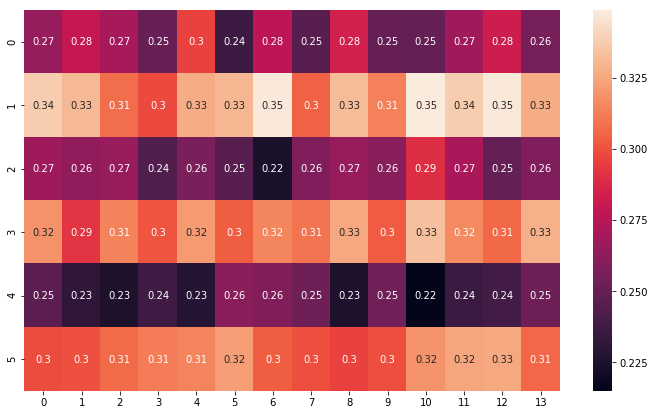

In [134]:
plt.figure(figsize=(12,7),)
sns.heatmap(np.array(f1_mat),annot=True)

<h3> xgboost 최적화

In [18]:
data_.loc[data_['DE1_dg']==8,['DE1_dg']]=0
X_train, X_test, y_train, y_test = train_test_split(data_, data_['DE1_dg'],test_size=0.2)
X_train = X_train.iloc[:, ~X_train.columns.isin(['DE1_dg'])]
X_test = X_test.iloc[:, ~X_test.columns.isin(['DE1_dg'])]

In [24]:
import xgboost as xgb


# Specify sufficient boosting iterations to reach a minimum
num_round = 200

# Leave most parameters as default
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': 2, # Number of possible output classes
         'tree_method': 'gpu_hist' # Use GPU accelerated algorithm
         }

# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

gpu_res = {} # Store accuracy result
# Train model
xgb = xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res)



[0]	test-merror:0.078106
[1]	test-merror:0.076587
[2]	test-merror:0.076208
[3]	test-merror:0.074499
[4]	test-merror:0.074594
[5]	test-merror:0.073645
[6]	test-merror:0.072886
[7]	test-merror:0.072411
[8]	test-merror:0.072696
[9]	test-merror:0.07355
[10]	test-merror:0.073171
[11]	test-merror:0.072981
[12]	test-merror:0.072696
[13]	test-merror:0.072411
[14]	test-merror:0.071747
[15]	test-merror:0.072791
[16]	test-merror:0.072317
[17]	test-merror:0.072411
[18]	test-merror:0.072127
[19]	test-merror:0.072886
[20]	test-merror:0.072791
[21]	test-merror:0.072696
[22]	test-merror:0.071462
[23]	test-merror:0.070608
[24]	test-merror:0.070229
[25]	test-merror:0.069754
[26]	test-merror:0.070134
[27]	test-merror:0.070039
[28]	test-merror:0.069564
[29]	test-merror:0.069754
[30]	test-merror:0.069564
[31]	test-merror:0.069564
[32]	test-merror:0.069469
[33]	test-merror:0.069375
[34]	test-merror:0.070324
[35]	test-merror:0.070039
[36]	test-merror:0.070703
[37]	test-merror:0.070608
[38]	test-merror:0.0706

In [27]:
res = xgb.predict(dtest)

In [29]:
f1_score(y_test, res)

0.3887550200803213